# SVM

Classificar o gênero de estudantes com base na nota em matemática e de escrita


In [462]:
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/talesjoabe/ECT2702-2020.2/master/SVM/StudentsPerformance.csv")

dataset.head() 


,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


## **Padronização da coluna gênero**

1: Female

0: Male

In [463]:
dataset['gender'].replace({'female' : 1, 'male' : 0},inplace=True)

In [464]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,standard,none,72,72,74
1,1,group C,some college,standard,completed,69,90,88
2,1,group B,master's degree,standard,none,90,95,93
3,0,group A,associate's degree,free/reduced,none,47,57,44
4,0,group C,some college,standard,none,76,78,75


## **Escolha dos atributos**

In [465]:
X = dataset.loc[:,['math score', 'writing score']].values
y = dataset['gender'].values

## **Divisão do conjunto de dados**

O conjunto de dados são divididos em Treinamento e Teste

In [466]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



## **Normalização**

Apesar da faixa de valores das notas serem iguais, ao normalizar **e** usar o kernel rbf, consigo ter uma acurácia maior.

In [467]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Treinamento**


In [468]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## **Avaliação do Modelo**

In [469]:
y_pred = classifier.predict(X_test)

print(y_test[0:25])
print(y_pred[0:25])

[1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0]
[1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0]


In [470]:
from sklearn.metrics import accuracy_score

print("Acurácia: ", accuracy_score(y_test,y_pred)*100, "%"  )

Acurácia:  88.4 %


In [471]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Matrix de confusão: ")
print(cm)


Matrix de confusão: 
[[101  21]
 [  8 120]]


## **Visualização dos dados**

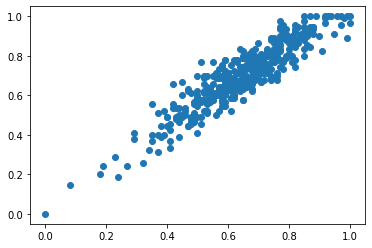

In [472]:
import matplotlib.pyplot as plt

# Seleção dos elementos classificados como female
math_female = X_train[y_train == 1, 0]
writing_female = X_train[y_train == 1, 1]

plt.scatter(math_female,writing_female)

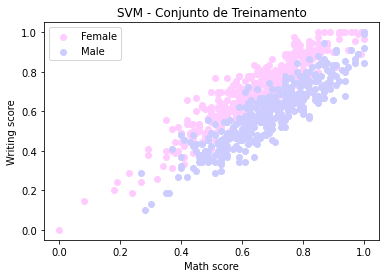

In [481]:
# Seleção dos elementos classificados como male
math_male  = X_train[y_train == 0, 0]
writing_male = X_train[y_train == 0, 1]

plt.scatter(math_female,writing_female, color='#FFCCFF', label = 'Female')
plt.scatter(math_male,writing_male, color='#CCCCFF', label = 'Male')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Math score')
plt.ylabel('Writing score')
plt.legend()
plt.show()

In [482]:
import numpy as np

# variação no eixo x para o plot 
vx = np.arange(start = -0.1, stop = 1.1, step = 0.1) 
vy = np.arange(start = -0.1, stop = 1.1, step = 0.1)

X1, X2 = np.meshgrid(vx,vy) 

In [483]:
vx = np.arange(-0.1, 1.1, 0.025) 
vy = np.arange(-0.1, 1.1, 0.025)
X1, X2 = np.meshgrid(vx,vy) 

In [485]:
y_pred_mesh =  classifier.predict(np.array([X1.ravel(),X2.ravel()]).T ).reshape(X1.shape)

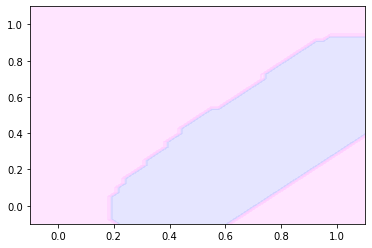

In [488]:
from matplotlib.colors import ListedColormap
plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('#CCCCFF', '#FFCCFF')))

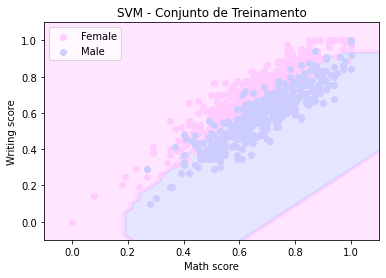

In [489]:
plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('#CCCCFF','#FFCCFF')))

plt.scatter(math_female,writing_female, color='#FFCCFF', label = 'Female')
plt.scatter(math_male,writing_male, color='#CCCCFF', label = 'Male')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Math score')
plt.ylabel('Writing score')
plt.legend()
plt.show()